In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("readxl")
install.packages("corrplot")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp8k5E1z\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp8k5E1z\downloaded_packages
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp8k5E1z\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp8k5E1z\downloaded_packages


In [2]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [57]:
# Load the dataset
animal_data <- read.csv("C:/Users/USER/Downloads/22000862 Labsheet 12/Animal_Dataset.csv")

# View the first few rows of the dataset
head(animal_data)

,Animal,Height..cm.,Weight..kg.,Color,Lifespan..years.,Diet,Habitat,Predators,Average.Speed..km.h.,Countries.Found,Conservation.Status,Family,Gestation.Period..days.,Top.Speed..km.h.,Social.Structure,Offspring.per.Birth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
2,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
3,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
4,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
5,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
6,Alpine Ibex,67-101,19-120,Brown,15-20,Herbivore,"Mountains, Alpine","Wolves, Golden Eagles",56-64,European Alps,Least Concern,Bovidae,150,56-64,Group-based,1


In [59]:
# Check for missing values
sum(is.na(animal_data))

[1] 0

In [61]:
# Remove rows with missing values
animal_data <- na.omit(animal_data)

# Summary statistics
summary(animal_data)

# Example: Impute missing values in the "Height (cm)" column with the median
animal_data$Height..cm.[is.na(animal_data$Height..cm.)] <- median(animal_data$Height..cm., na.rm = TRUE)

    Animal          Height..cm.        Weight..kg.           Color          
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Lifespan..years.       Diet             Habitat           Predators        
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Average.Speed..km.h. Countries.Found    Conservation.Status    Family         
 Length:205           Length:205         Length:205          Length:205        
 Class :character     Class :character   Class :character    Class :character  
 Mode  :character     Mode  :character   Mode  :character    Mode  :character  
 Gestation.Period..days. Top.Speed..km.h.   Social.Structure  
 

In [7]:
# Structure of the dataset
str(animal_data)

# Correlation analysis (for numeric columns)
cor_matrix <- cor(animal_data[, sapply(animal_data, is.numeric)])
print(cor_matrix)

'data.frame':	205 obs. of  16 variables:
 $ Animal                 : chr  "Aardvark" "Aardwolf" "African Elephant" "African Lion" ...
 $ Height..cm.            : chr  "105-130" "40-50" "270-310" "80-110" ...
 $ Weight..kg.            : chr  "40-65" "8-14" "2700-6000" "120-250" ...
 $ Color                  : chr  "Grey" "Yellow-brown" "Grey" "Tan" ...
 $ Lifespan..years.       : chr  "20-30" "10-12" "60-70" "10-14" ...
 $ Diet                   : chr  "Insectivore" "Insectivore" "Herbivore" "Carnivore" ...
 $ Habitat                : chr  "Savannas, Grasslands" "Grasslands, Savannas" "Savannah, Forest" "Grasslands, Savannas" ...
 $ Predators              : chr  "Lions, Hyenas" "Lions, Leopards" "Lions, Hyenas" "Hyenas, Crocodiles" ...
 $ Average.Speed..km.h.   : chr  "40" "24-30" "25" "58" ...
 $ Countries.Found        : chr  "Africa" "Eastern and Southern Africa" "Africa" "Africa" ...
 $ Conservation.Status    : chr  "Least Concern" "Least Concern" "Vulnerable" "Vulnerable" ...
 $ Fam

In [65]:
str(animal_data$Lifespan..years.)

# Convert Lifespan..years. to numeric
animal_data$Lifespan..years. <- as.numeric(animal_data$Lifespan..years.)

# Check for NA values
sum(is.na(animal_data$Lifespan..years.))

# Option 1: Remove rows with NA values
animal_data <- na.omit(animal_data)

# Option 2: Impute NA values (e.g., with the median)
animal_data$Lifespan..years.[is.na(animal_data$Lifespan..years.)] <- median(animal_data$Lifespan..years., na.rm = TRUE)

 num [1:4] 70 80 4 10


[1] 0

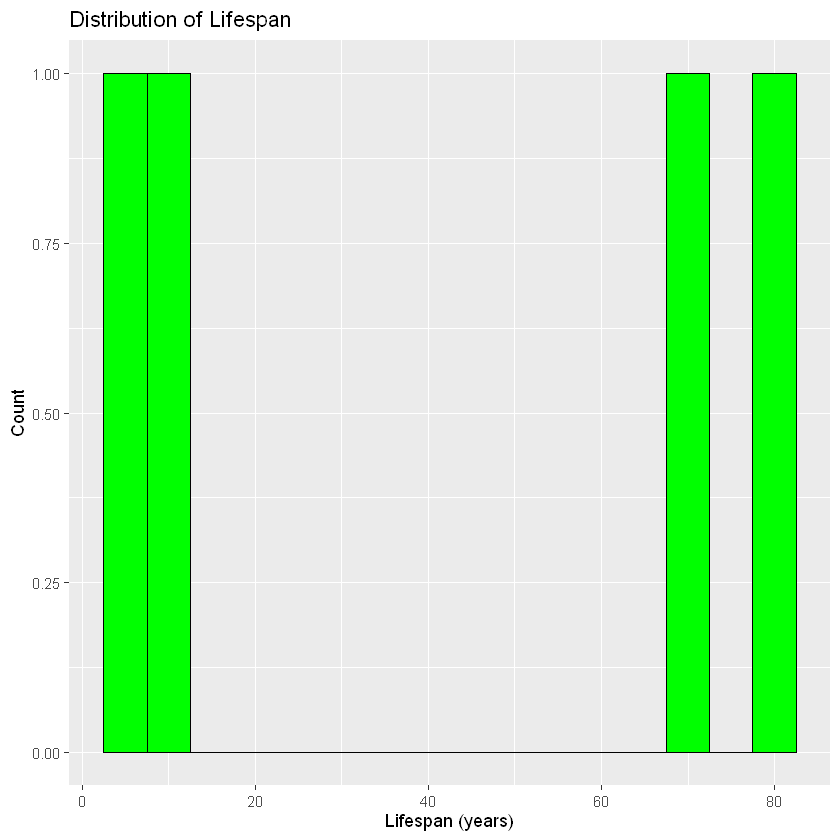

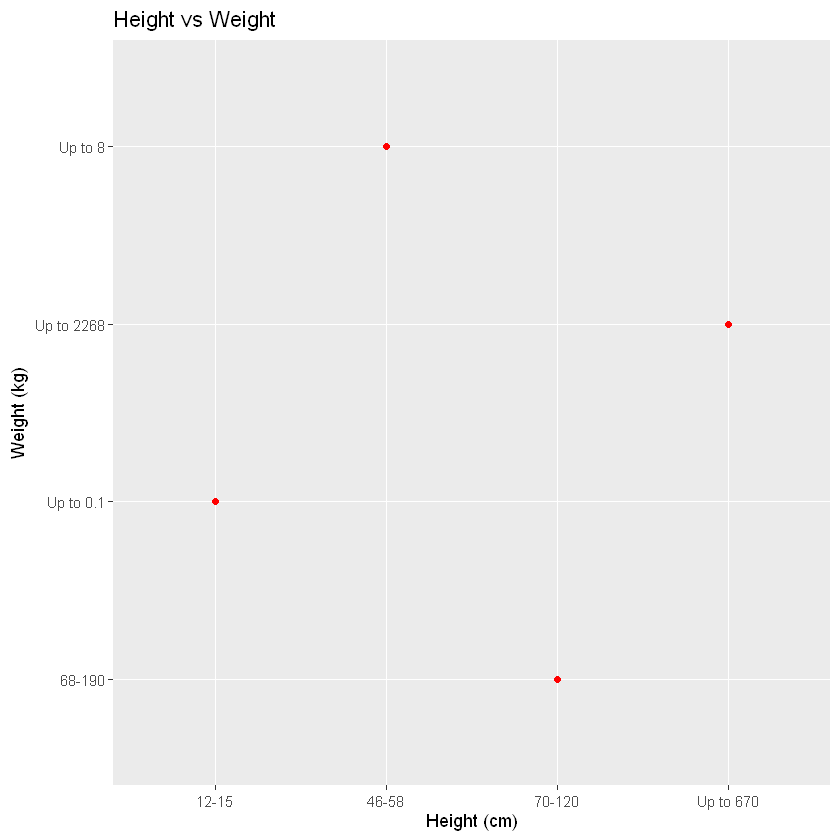

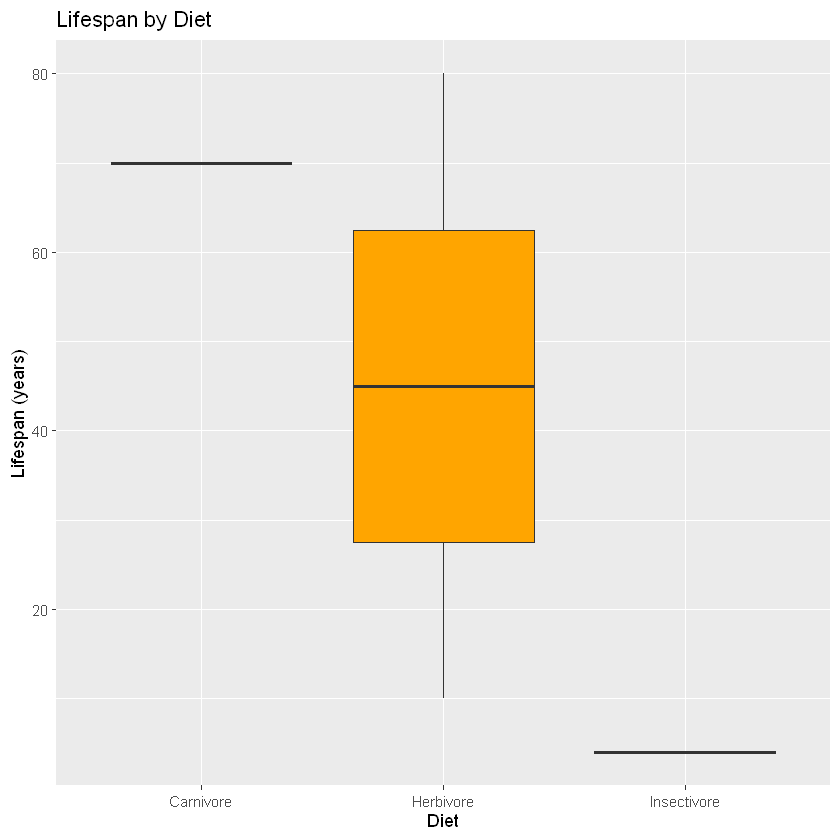

In [67]:
# Load ggplot2
library(ggplot2)

# Histogram of Lifespan
ggplot(animal_data, aes(x = Lifespan..years.)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black") +
  labs(title = "Distribution of Lifespan", x = "Lifespan (years)", y = "Count")

# Scatter plot of Height vs Weight
ggplot(animal_data, aes(x = Height..cm., y = Weight..kg.)) +
  geom_point(color = "red") +
  labs(title = "Height vs Weight", x = "Height (cm)", y = "Weight (kg)")

# Box plot of Lifespan by Diet
ggplot(animal_data, aes(x = Diet, y = Lifespan..years.)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Lifespan by Diet", x = "Diet", y = "Lifespan (years)")

In [71]:
# Convert Height..cm. to character (if it's not already)
animal_data$Height..cm. <- as.character(animal_data$Height..cm.)

# Split the ranges and calculate the midpoint
animal_data$Height..cm. <- sapply(strsplit(animal_data$Height..cm., "-"), function(x) mean(as.numeric(x)))

# Convert Weight..kg. to character (if it's not already)
animal_data$Weight..kg. <- as.character(animal_data$Weight..kg.)

# Split the ranges and calculate the midpoint
animal_data$Weight..kg. <- sapply(strsplit(animal_data$Weight..kg., "-"), function(x) mean(as.numeric(x)))

# Convert Lifespan..years. to character (if it's not already)
animal_data$Lifespan..years. <- as.character(animal_data$Lifespan..years.)

# Split the ranges and calculate the midpoint
animal_data$Lifespan..years. <- sapply(strsplit(animal_data$Lifespan..years., "-"), function(x) mean(as.numeric(x)))

# Convert Average.Speed..km.h. to character (if it's not already)
animal_data$Average.Speed..km.h. <- as.character(animal_data$Average.Speed..km.h.)

# Split the ranges and calculate the midpoint
animal_data$Average.Speed..km.h. <- sapply(strsplit(animal_data$Average.Speed..km.h., "-"), function(x) mean(as.numeric(x)))

# Check for NA values and handle them
animal_data <- na.omit(animal_data)

# descriptive statistics
mean_height <- mean(animal_data$Height..cm.)
median_weight <- median(animal_data$Weight..kg.)
var_lifespan <- var(animal_data$Lifespan..years.)
sd_speed <- sd(animal_data$Average.Speed..km.h.)

# Print the results
print(paste("Mean Height:", mean_height))
print(paste("Median Weight:", median_weight))
print(paste("Variance of Lifespan:", var_lifespan))
print(paste("Standard Deviation of Speed:", sd_speed))

[1] "Mean Height: 95"
[1] "Median Weight: 129"
[1] "Variance of Lifespan: NA"
[1] "Standard Deviation of Speed: NA"


In [75]:
# Hypothesis testing (e.g., t-test to compare lifespans of carnivores and herbivores)
carnivores <- animal_data[animal_data$Diet == "Carnivore", "Lifespan..years."]
herbivores <- animal_data[animal_data$Diet == "Herbivore", "Lifespan..years."]
t.test(carnivores, herbivores)

ERROR: Error in t.test.default(carnivores, herbivores): not enough 'x' observations
